In [1]:
def dijkstra(graph, source):
  dist = {vertex: float('infinity') for vertex in graph}
  dist[source] = 0
  sptSet = set()

  while len(sptSet) < len(graph):
    u = min((vertex for vertex in dist if vertex not in sptSet), key=dist.get)
    sptSet.add(u)

    for neighbor, weight in graph[u].items():
      if neighbor not in sptSet:
        if dist[u] + weight < dist[neighbor]:
          dist[neighbor] = dist[u] + weight
    print(f'{u} as minimum', ': ', dist)

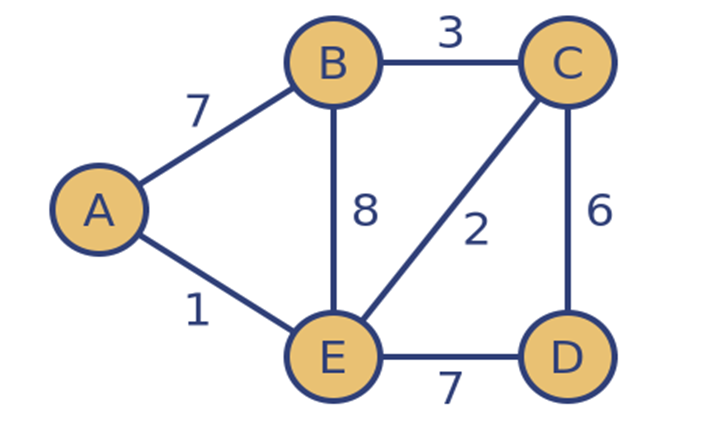

In [2]:
graph = {
    'A': {'B': 7, 'E': 1},
    'B': {'A': 7, 'C': 3, 'E': 8},
    'C': {'B': 3, 'E': 2, 'D': 6},
    'D': {'C': 6, 'E': 7},
    'E': {'A': 1, 'B': 8, 'C': 2, 'D': 7}
}

dijkstra(graph, 'A')

A as minimum :  {'A': 0, 'B': 7, 'C': inf, 'D': inf, 'E': 1}
E as minimum :  {'A': 0, 'B': 7, 'C': 3, 'D': 8, 'E': 1}
C as minimum :  {'A': 0, 'B': 6, 'C': 3, 'D': 8, 'E': 1}
B as minimum :  {'A': 0, 'B': 6, 'C': 3, 'D': 8, 'E': 1}
D as minimum :  {'A': 0, 'B': 6, 'C': 3, 'D': 8, 'E': 1}


In [3]:
def bellman_ford(graph, source):
  # Initialize distances from the source to all vertices as infinity
  # except the source itself which is set to zero.
  dist = {vertex: float('infinity') for vertex in graph}
  dist[source] = 0

  # Define the order of vertices
  vertices = sorted(graph.keys())

  # Relax edges repeatedly
  for i in range(len(graph) - 1):
    for vertex in graph:
      for neighbor, weight in graph[vertex].items():
        if dist[vertex] + weight < dist[neighbor]:
            dist[neighbor] = dist[vertex] + weight
    print(i, 'round of relaxation: ', {v: dist[v] for v in vertices})

  # Check for negative weight cycles
  for vertex in graph:
    for neighbor, weight in graph[vertex].items():
      if dist[vertex] + weight < dist[neighbor]:
        print("Graph contains a negative weight cycle")

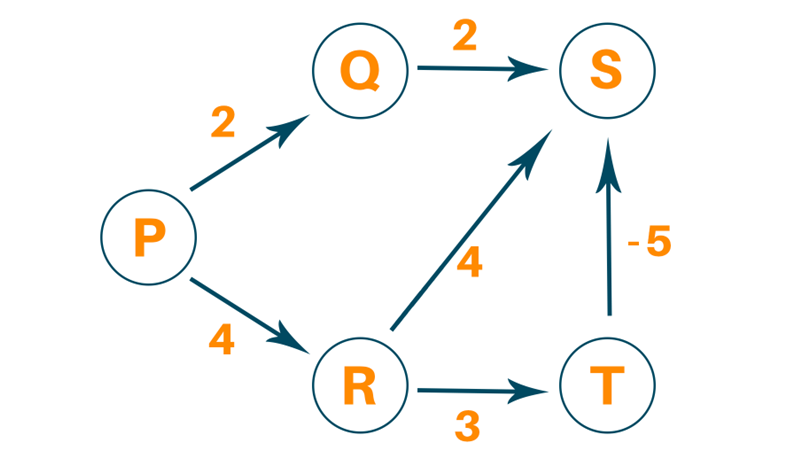

In [4]:
graph = {
    'Q': {'S': 2},
    'T': {'S': -5},
    'S': {},
    'R': {'S': 4, 'T': 3},
    'P': {'Q': 2, 'R': 4}
}

bellman_ford(graph, 'P')

0 round of relaxation:  {'P': 0, 'Q': 2, 'R': 4, 'S': inf, 'T': inf}
1 round of relaxation:  {'P': 0, 'Q': 2, 'R': 4, 'S': 4, 'T': 7}
2 round of relaxation:  {'P': 0, 'Q': 2, 'R': 4, 'S': 2, 'T': 7}
3 round of relaxation:  {'P': 0, 'Q': 2, 'R': 4, 'S': 2, 'T': 7}


In [5]:
def dfs(graph, start, visited=None, stack=None):
    # Initialize visited list if not provided
    if visited is None:
        visited = []
    # Initialize stack if not provided
    if stack is None:
        stack = []
    # Mark the current node as visited
    visited.append(start)
    # Visit all the neighbors of the current node
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited, stack)
    # Push the current node onto the stack after visiting all neighbors
    stack.append(start)

def topological_sort(graph):
    # Initialize visited list and stack
    visited = []
    stack = []
    # Perform DFS from each node that hasn't been visited yet
    for node in graph:
        if node not in visited:
            dfs(graph, node, visited, stack)
    # Return the elements in reverse order of their completion times
    return stack[::-1]

def dag_shortest_path(graph, source):
    # Perform topological sort using DFS
    topological_order = topological_sort(graph)
    print(f'Topological sort: {topological_order}\n')

    # Initialize distances to all vertices as infinite
    dist = {vertex: float('infinity') for vertex in topological_order}
    # Set the distance to the source node to zero
    dist[source] = 0

    # Process vertices in topological order
    for vertex in topological_order:
        # Update the distances to the neighbors of the current vertex
        for neighbor, weight in graph[vertex].items():
            if dist[vertex] + weight < dist[neighbor]:
                dist[neighbor] = dist[vertex] + weight
        # Print the current state of distances
        print(f'Process node {vertex}: {dist}')

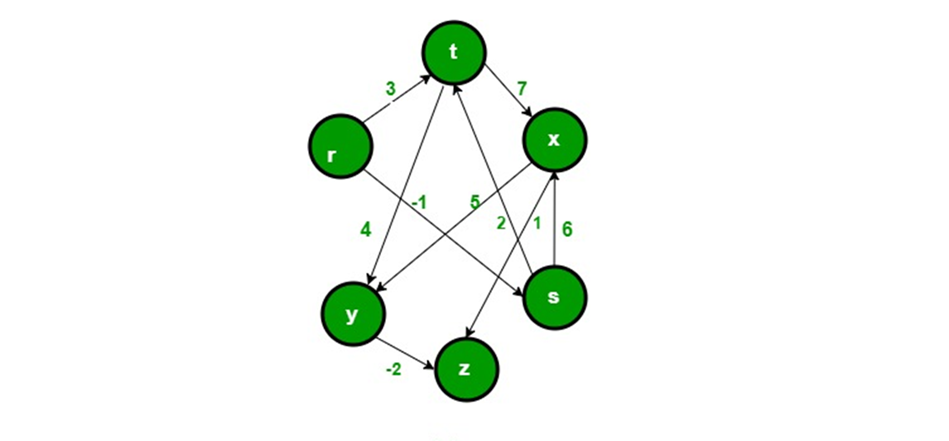

In [6]:
graph = {
    's': {'t': 2, 'x': 6},
    'r': {'s': 5, 't': 3},
    't': {'x': 7, 'y': 4},
    'x': {'y': -1, 'z': 1},
    'y': {'z': -2},
    'z': {},
}

dag_shortest_path(graph, 's')

Topological sort: ['r', 's', 't', 'x', 'y', 'z']

Process node r: {'r': inf, 's': 0, 't': inf, 'x': inf, 'y': inf, 'z': inf}
Process node s: {'r': inf, 's': 0, 't': 2, 'x': 6, 'y': inf, 'z': inf}
Process node t: {'r': inf, 's': 0, 't': 2, 'x': 6, 'y': 6, 'z': inf}
Process node x: {'r': inf, 's': 0, 't': 2, 'x': 6, 'y': 5, 'z': 7}
Process node y: {'r': inf, 's': 0, 't': 2, 'x': 6, 'y': 5, 'z': 3}
Process node z: {'r': inf, 's': 0, 't': 2, 'x': 6, 'y': 5, 'z': 3}


In [7]:
from collections import deque

def bfs_shortest_paths(graph, start):
    # Initialize distances with infinity for all nodes
    distances = {vertex: float('infinity') for vertex in graph}
    # Set the distance to the start node to zero
    distances[start] = 0
    # Initialize the queue with the start node
    queue = deque([start])

    # Process nodes in the queue
    while queue:
        node = queue.popleft()
        # Visit all neighbors of the current node
        for neighbor in graph[node]:
            # If the neighbor hasn't been visited yet
            if distances[neighbor] == float('infinity'):
                # Add the neighbor to the queue
                queue.append(neighbor)
                # Update the distance to the neighbor
                distances[neighbor] = distances[node] + 1
                # Print the current state of distances
                print(distances)

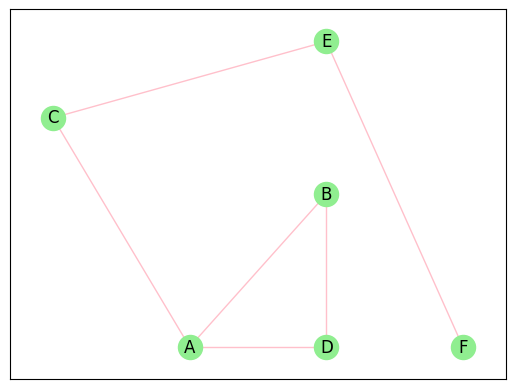

In [8]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['A', 'B'],
    'E': ['C', 'F'],
    'F': ['E']
}

bfs_shortest_paths(graph, 'A')

{'A': 0, 'B': 1, 'C': inf, 'D': inf, 'E': inf, 'F': inf}
{'A': 0, 'B': 1, 'C': 1, 'D': inf, 'E': inf, 'F': inf}
{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': inf, 'F': inf}
{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': inf}
{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 3}


In [9]:
import numpy as np

def floyd_warshall(graph):
    num_vertices = graph.shape[0]
    # Create a copy of the graph to store distances
    dist = graph.copy()

    # Apply Floyd-Warshall algorithm
    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                # Update the distance if a shorter path is found
                if dist[i, j] > dist[i, k] + dist[k, j]:
                    dist[i, j] = dist[i, k] + dist[k, j]
        # Print the distance matrix after considering each intermediate node
        print(f'Using node {k+1} as intermediate node:\n', dist, '\n')

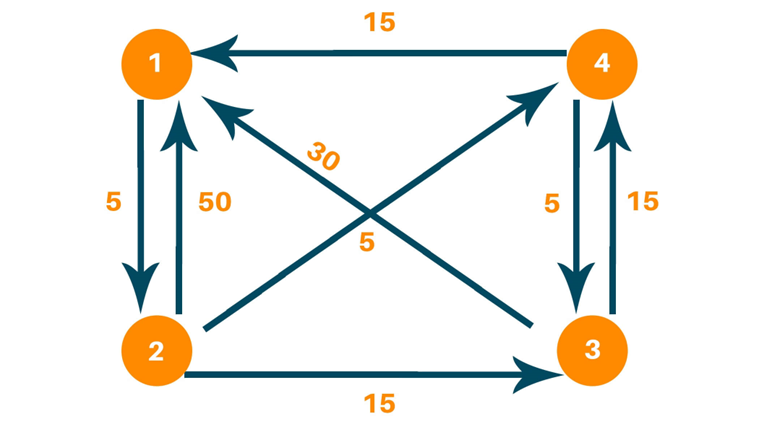

In [10]:
graph = np.array([
    [0, 5, np.inf, np.inf],
    [50, 0, 15, 5],
    [30, np.inf, 0, 15],
    [15, np.inf, 5, 0]
])

floyd_warshall(graph)

Using node 1 as intermediate node:
 [[ 0.  5. inf inf]
 [50.  0. 15.  5.]
 [30. 35.  0. 15.]
 [15. 20.  5.  0.]] 

Using node 2 as intermediate node:
 [[ 0.  5. 20. 10.]
 [50.  0. 15.  5.]
 [30. 35.  0. 15.]
 [15. 20.  5.  0.]] 

Using node 3 as intermediate node:
 [[ 0.  5. 20. 10.]
 [45.  0. 15.  5.]
 [30. 35.  0. 15.]
 [15. 20.  5.  0.]] 

Using node 4 as intermediate node:
 [[ 0.  5. 15. 10.]
 [20.  0. 10.  5.]
 [30. 35.  0. 15.]
 [15. 20.  5.  0.]] 



In [11]:
def bellman_ford(graph, source):
    # Initialize distances from the source to all vertices as infinity except the source itself which is set to zero.
    dist = {vertex: float('infinity') for vertex in graph}
    dist[source] = 0

    # Define the order of vertices
    vertices = sorted(graph.keys())

    # Relax edges repeatedly
    for _ in range(len(graph) - 1):
        for vertex in graph:
            for neighbor, weight in graph[vertex].items():
                if dist[vertex] + weight < dist[neighbor]:
                    dist[neighbor] = dist[vertex] + weight

    # Check for negative weight cycles
    for vertex in graph:
        for neighbor, weight in graph[vertex].items():
            if dist[vertex] + weight < dist[neighbor]:
                print("Graph contains a negative weight cycle")

    return dist

def dijkstra(graph, source):
    # Initialize distances from the source to all vertices as infinity except the source itself which is set to zero.
    dist = {vertex: float('infinity') for vertex in graph}
    dist[source] = 0
    # Set to store vertices included in shortest path tree (sptSet)
    sptSet = set()

    while len(sptSet) < len(graph):
        # Select the vertex with the minimum distance from the set of vertices not yet processed
        u = min((vertex for vertex in dist if vertex not in sptSet), key=dist.get)
        sptSet.add(u)

        # Update distance value of the adjacent vertices of the selected vertex
        for neighbor, weight in graph[u].items():
            if neighbor not in sptSet:
                if dist[u] + weight < dist[neighbor]:
                    dist[neighbor] = dist[u] + weight

    return dist

def johnson(graph):
    new_vertex = 'q'
    # Add a new vertex 'q' and connect it to all other vertices with zero-weight edges
    new_graph = {new_vertex: {v: 0 for v in graph}}
    new_graph.update(graph)

    # Running Bellman-Ford algorithm with 'q' as the source node
    h = bellman_ford(new_graph, new_vertex)

    # Reweight the edges using the potentials calculated from Bellman-Ford
    reweighted_graph = {u: {v: w + h[u] - h[v] for v, w in edges.items()} for u, edges in graph.items()}

    all_pairs_shortest_paths = {}
    # Apply Dijkstra's algorithm for each vertex in the graph
    for u in graph:
        dist = dijkstra(reweighted_graph, u)
        all_pairs_shortest_paths[u] = {v: d + h[v] - h[u] for v, d in dist.items()}
        # Print the shortest paths from the source vertex 'u'
        print(f'{u} as source:', all_pairs_shortest_paths[u], '\n')

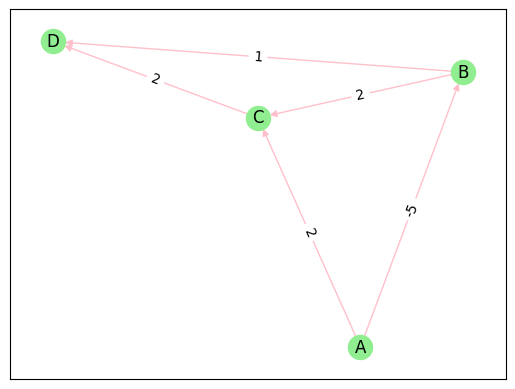

In [12]:
graph = {
    'A': {'B': -5, 'C': 2},
    'B': {'C': 2, 'D': 1},
    'C': {'D': 2},
    'D': {}
}

johnson(graph)

A as source: {'A': 0, 'B': -5, 'C': -3, 'D': -4} 

B as source: {'A': inf, 'B': 0, 'C': 2, 'D': 1} 

C as source: {'A': inf, 'B': inf, 'C': 0, 'D': 2} 

D as source: {'A': inf, 'B': inf, 'C': inf, 'D': 0} 



In [13]:
from collections import deque

def bfs_shortest_paths(graph, start):
    # Initialize distances from start to all vertices as infinity, except start itself set to zero
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    # Initialize the queue with the start vertex
    queue = deque([start])

    # Process vertices in the queue
    while queue:
        node = queue.popleft()
        # Visit all neighbors of the current vertex
        for neighbor in graph[node]:
            # If the neighbor hasn't been visited yet
            if distances[neighbor] == float('infinity'):
                # Add the neighbor to the queue
                queue.append(neighbor)
                # Update the distance to the neighbor
                distances[neighbor] = distances[node] + 1
    return distances

def all_pairs_shortest_paths(graph):
    all_distances = {}
    # Calculate shortest paths from each vertex to every other vertex
    for vertex in graph:
        all_distances[vertex] = bfs_shortest_paths(graph, vertex)
        # Print the current state of all shortest paths
        print(f'Shortest paths from {vertex}: {all_distances[vertex]}')
    return all_distances

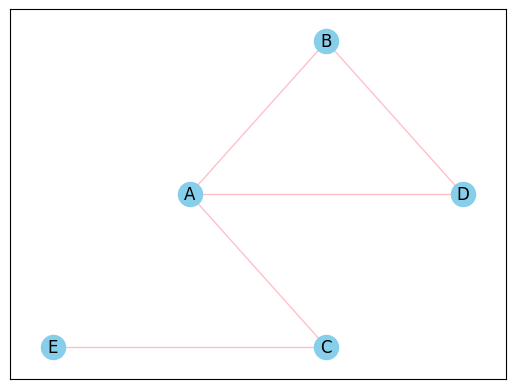

In [14]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['A', 'B'],
    'E': ['C'],
}

all_pairs_shortest_paths(graph)

Shortest paths from A: {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2}
Shortest paths from B: {'A': 1, 'B': 0, 'C': 2, 'D': 1, 'E': 3}
Shortest paths from C: {'A': 1, 'B': 2, 'C': 0, 'D': 2, 'E': 1}
Shortest paths from D: {'A': 1, 'B': 1, 'C': 2, 'D': 0, 'E': 3}
Shortest paths from E: {'A': 2, 'B': 3, 'C': 1, 'D': 3, 'E': 0}


{'A': {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2},
 'B': {'A': 1, 'B': 0, 'C': 2, 'D': 1, 'E': 3},
 'C': {'A': 1, 'B': 2, 'C': 0, 'D': 2, 'E': 1},
 'D': {'A': 1, 'B': 1, 'C': 2, 'D': 0, 'E': 3},
 'E': {'A': 2, 'B': 3, 'C': 1, 'D': 3, 'E': 0}}